<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_week10_healthcareipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age        bmi  systolic_bp  diastolic_bp  cholesterol  steps_per_day
0   58  24.532838   119.779226     76.519869   151.011432    7999.053970
1   71  31.615813   131.946081     81.985584   182.816947   11577.364138
2   48  35.533025   115.779223     65.656350   224.014947    4912.054320
3   34  31.367947    95.029602     85.810220   205.378238    6582.079025
4   62  27.045722   119.907013     64.759848   215.985797    6742.985038


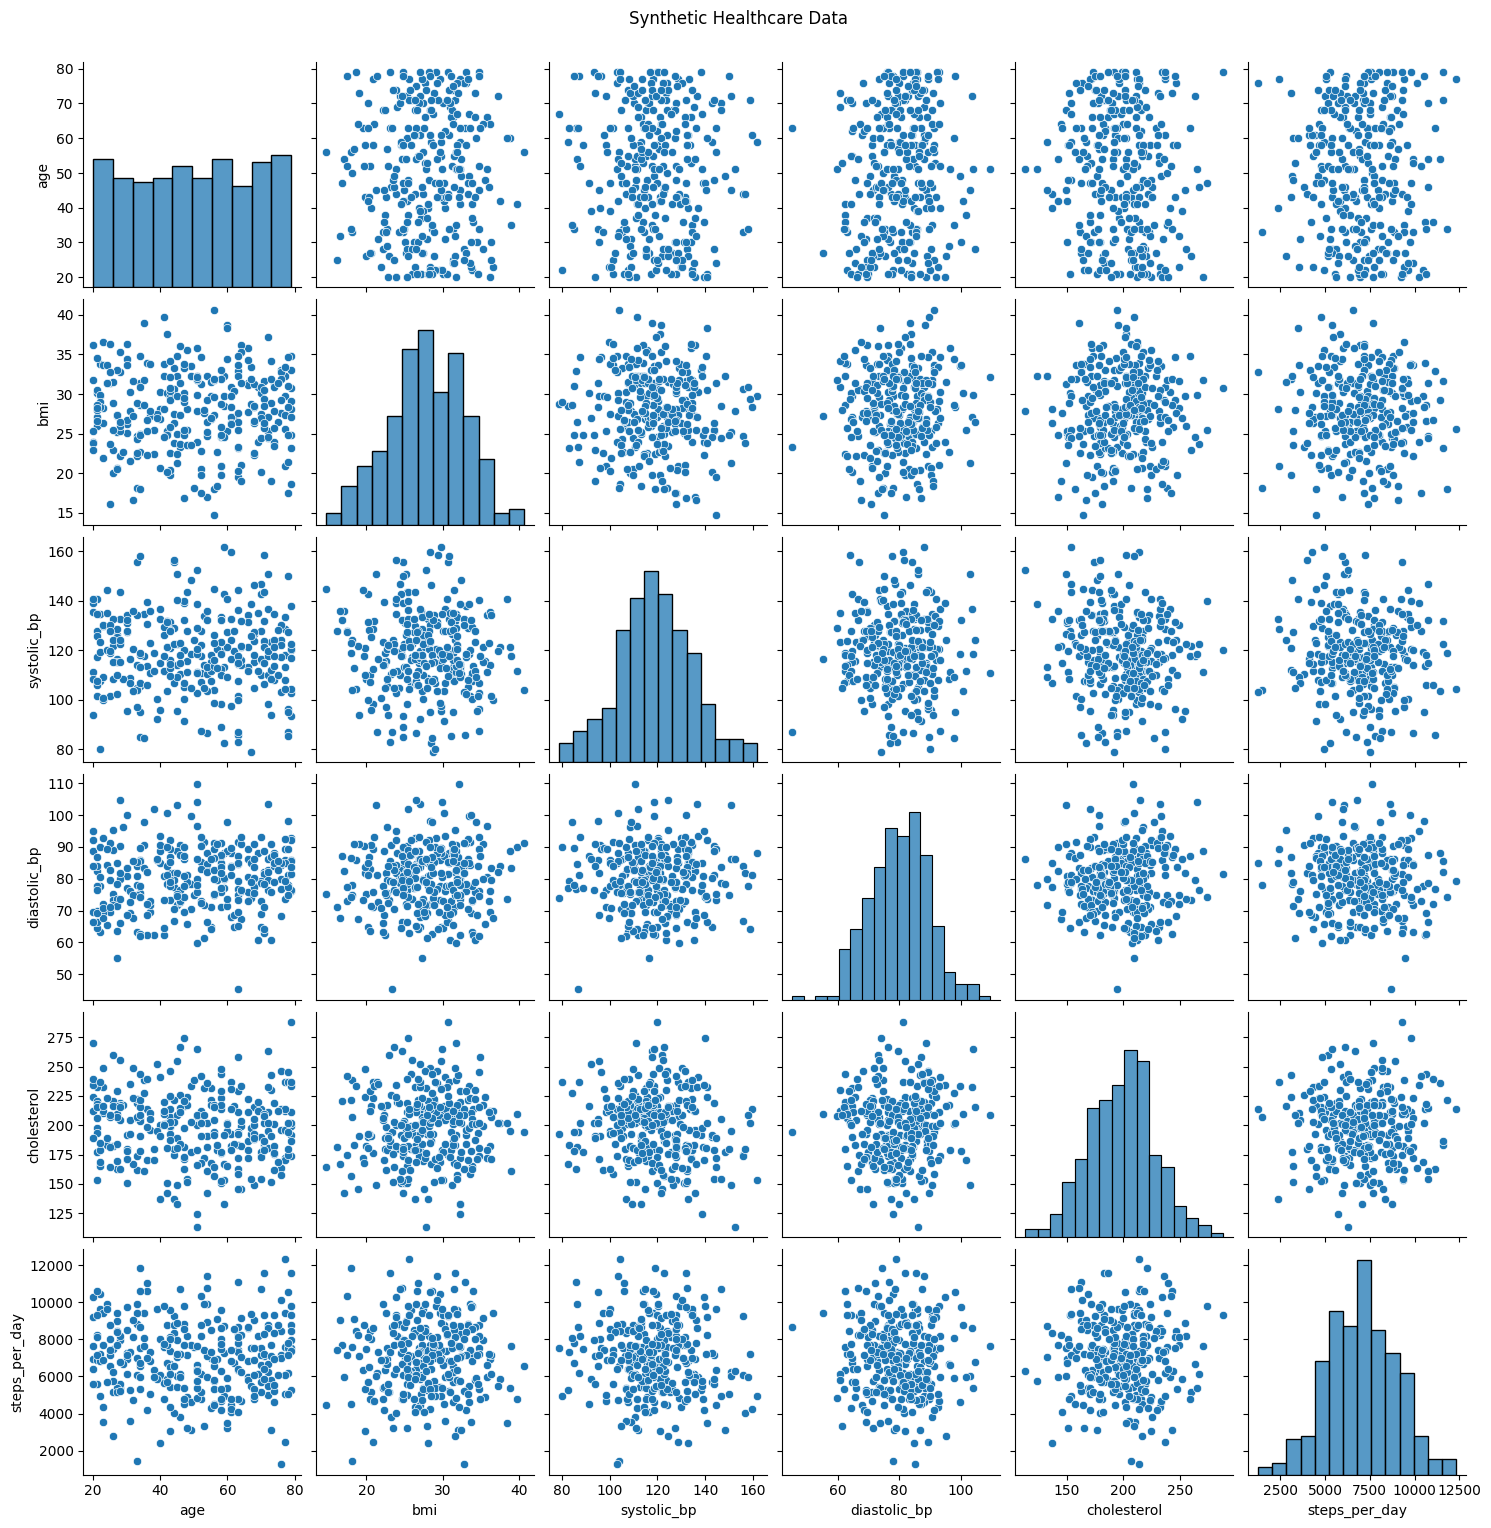

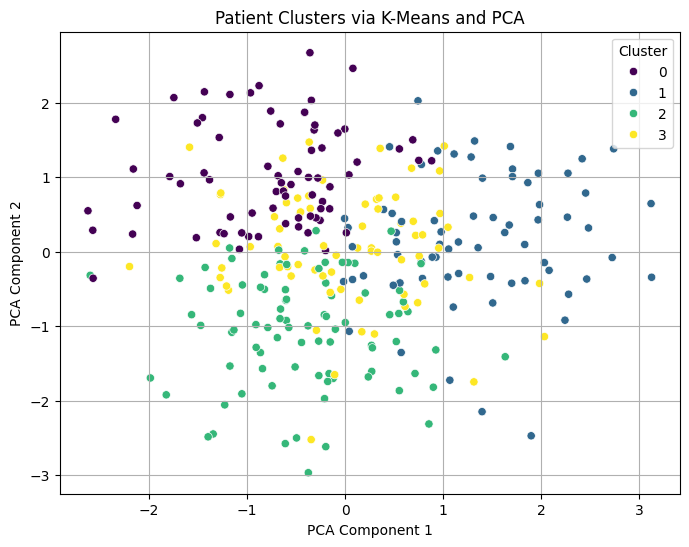


🏥 Cluster Centers (approximate patient profiles):
    age   bmi  systolic_bp  diastolic_bp  cholesterol  steps_per_day
0  55.1  31.2        114.7          88.1        216.0         6332.6
1  52.3  24.6        132.4          79.1        183.7         5482.7
2  31.5  28.9        119.7          74.8        208.2         7791.9
3  64.2  26.5        109.4          79.1        185.1         8297.1


In [1]:
# 🏥 Healthcare K-Means Clustering Notebook
# Author: Charles Dorner, EdD (Candidate)
# Sector: Healthcare Analytics
# Goal: Cluster synthetic patient records based on health features

# 📦 Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 🧪 Generate Synthetic Healthcare Dataset
np.random.seed(42)
n_patients = 300

# Features: age, BMI, systolic_bp, diastolic_bp, cholesterol, steps_per_day
age = np.random.randint(20, 80, n_patients)
bmi = np.random.normal(27, 5, n_patients)
systolic_bp = np.random.normal(120, 15, n_patients)
diastolic_bp = np.random.normal(80, 10, n_patients)
cholesterol = np.random.normal(200, 30, n_patients)
steps_per_day = np.random.normal(7000, 2000, n_patients)

# 🧾 Create DataFrame
df = pd.DataFrame({
    'age': age,
    'bmi': bmi,
    'systolic_bp': systolic_bp,
    'diastolic_bp': diastolic_bp,
    'cholesterol': cholesterol,
    'steps_per_day': steps_per_day
})

# 🔍 Explore the Dataset
print(df.head())
sns.pairplot(df)
plt.suptitle("Synthetic Healthcare Data", y=1.02)
plt.show()

# 🧼 Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 🧪 Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# 🔬 Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title("Patient Clusters via K-Means and PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# 📊 Cluster Centers (Unscaled)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
print("\n🏥 Cluster Centers (approximate patient profiles):")
print(centers.round(1))
